In [1]:
import matplotlib.pyplot as pit
from pylab import *
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import torch.utils.data as data
import numpy as np
import os 

from torchvision.transforms.functional import center_crop


from sklearn.metrics import confusion_matrix
import seaborn as sn

In [3]:
train_dir = "E:\\Anaconda\\envs\\dataset\\New folder"


In [4]:
def crop224(image):
    return center_crop(image, 800)

In [4]:
TRANSFORM_IMG =transforms.Compose([
#     transforms.Lambda(crop224),
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
#     transforms.Normalize(mean=[0.5,0.5,0.5],
#                          std=[0.5,0.5,0.5])
])

In [5]:
train_data = torchvision.datasets.ImageFolder(root=train_dir, transform=TRANSFORM_IMG)
train_data

Dataset ImageFolder
    Number of datapoints: 7334
    Root location: E:\Anaconda\envs\dataset\New folder
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [6]:
train, test = torch.utils.data.random_split(train_data, [0.8,0.2], generator=torch.Generator().manual_seed(42))
trainloader = torch.utils.data.DataLoader(train, batch_size=4,shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test, batch_size=10,shuffle=True, num_workers=2)

In [8]:
# img ,label = train_data[1]
# plt.imshow(img.permute(1,2,0))

In [7]:
print("Number of train samples: ",len(train_data))
print("Detected Classes are: ",train_data.class_to_idx)

Number of train samples:  7334
Detected Classes are:  {'actinic keratosis': 0, 'basal cell carcinoma': 1, 'melanoma': 2, 'nevus': 3, 'pigmented benign keratosis': 4, 'seborrheic keratosis': 5, 'squamous cell carcinoma': 6}


In [8]:
labels = np.array(train_data.targets)
(unique,counts) = np.unique(labels,return_counts=True)
frequencies = np.asarray((unique,counts)).T
frequencies

array([[   0, 1011],
       [   1, 1084],
       [   2, 1000],
       [   3, 1000],
       [   4, 1339],
       [   5, 1021],
       [   6,  879]], dtype=int64)

In [ ]:
# train_data_loader_torch = data.DataLoader(train_data, batch_size=len(train_data))
# train_data_loader_torch

In [ ]:
# dataset = next(iter(train_data_loader_torch))

In [ ]:
# images,labels = next(iter(train_data_loader_torch))


In [ ]:
# # plt.imshow(images[0].permute(1,2,0))
# # plt.show()
# # print(f"Label: {labels[0]}")
# print(labels)


In [ ]:
# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=1)

In [ ]:
# # plt.imshow(X_train[2].permute(1,2,0))
# # plt.show()
# # print(f"Label: {y_train[2]}")
# y_train.shape

In [ ]:
# y_test.shape

In [ ]:
# X_train.shape

In [9]:
VGG_types = {
    "VGG11": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG13": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
    "VGG16": [64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"],
    "VGG19": [64, 64, "M", 128, 128, "M", 256, 256, 256, 256,"M", 512, 512, 512, 512,"M", 512, 512, 512, 512,"M"]
}


In [10]:
class VGG_net(nn.Module):
    def __init__(self, in_channels=3, num_classes=1000):
        super(VGG_net, self).__init__()
        self.in_channels = in_channels
        self.conv_layers = self.create_conv_layers(VGG_types["VGG16"])

        self.fcs = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fcs(x)
        return x

    def create_conv_layers(self, architecture):
        layers = []
        in_channels = self.in_channels

        for x in architecture:
            if type(x) == int:
                out_channels = x

                layers += [
                    nn.Conv2d(
                        in_channels=in_channels,
                        out_channels=out_channels,
                        kernel_size=(3, 3),
                        stride=(1, 1),
                        padding=(1, 1),
                    ),
                    nn.BatchNorm2d(x),
                    nn.ReLU(),
                ]
                in_channels = x
            elif x == "M":
                layers += [nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))]

        return nn.Sequential(*layers)

In [13]:
if __name__ == "__main__":
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model = VGG_net(in_channels=3, num_classes=1000).to(device)
    BATCH_SIZE = 3
    x = torch.randn(3, 3, 224, 224).to(device)
    assert model(x).shape == torch.Size([BATCH_SIZE, 1000])
    print(model(x).shape)

torch.Size([3, 1000])


In [11]:
# cuda:0
device = torch.device('cuda:0')
print(device)

cuda:0


In [13]:
torch.cuda.is_available() 


True

In [25]:

# !pip install scikit-learn


     ---------------------------------------- 8.4/8.4 MB 4.4 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ---------------------------------------- 42.5/42.5 MB 3.8 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [12]:

model=VGG_net(in_channels=3, num_classes=7).to(device)
model

VGG_net(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3),

In [32]:
params = list(model.parameters())
print(len(params))
print(params[0].size())

70
torch.Size([64, 3, 3, 3])


In [29]:
input = torch.randn(1, 3, 224, 224).to(device)
out = model(input)
print(out)

tensor([[0.1944, 0.0409]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
# , momentum=0.9

In [19]:
torch.cuda.empty_cache()

In [62]:
# import gc
# del variables
# gc.collect()

NameError: name 'variables' is not defined

[1,   500] loss: 101.391
[1,  1000] loss: 103.367
[2,   500] loss: 87.004
[2,  1000] loss: 94.896
[3,   500] loss: 85.020
[3,  1000] loss: 90.424
[4,   500] loss: 79.615
[4,  1000] loss: 80.595
[5,   500] loss: 73.636
[5,  1000] loss: 79.866
Finished Training


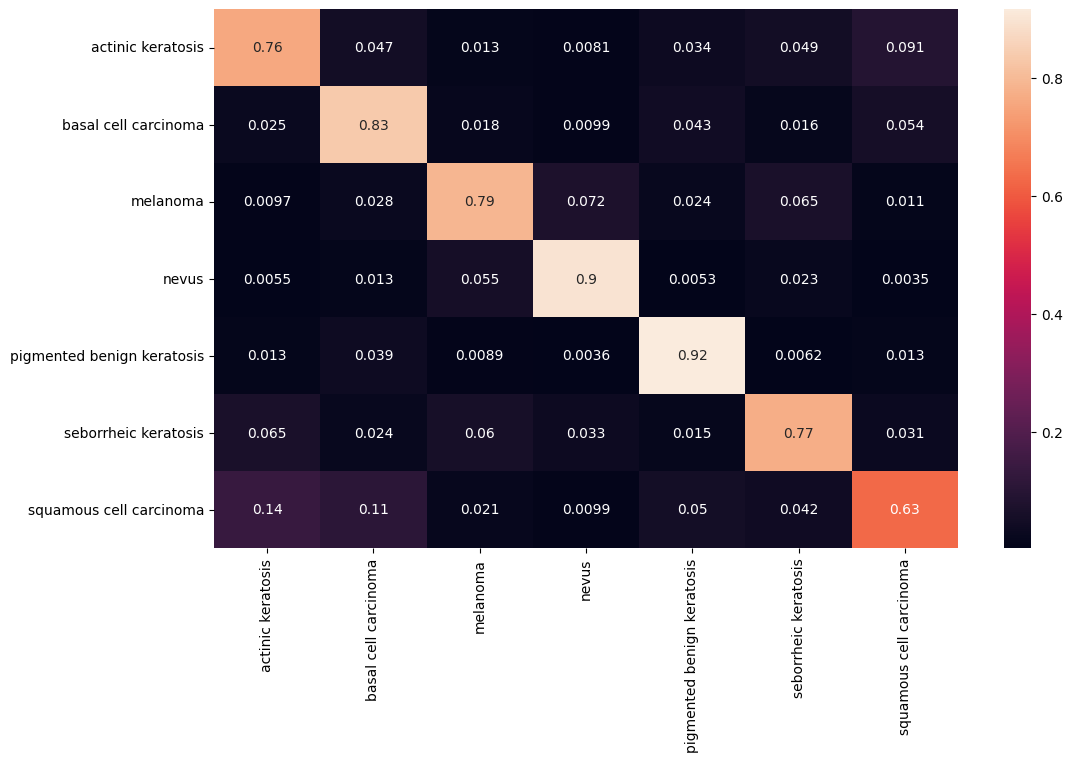

In [30]:
y_pred = []
y_true = []
classes=('actinic keratosis', 'basal cell carcinoma', 'melanoma', 'nevus', 'pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma')


for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 3:.3f}')
            running_loss = 0.0
            
        _, predictions = torch.max(outputs, 1)
        y_pred.extend(predictions.cpu())
        y_true.extend(labels.cpu())

print('Finished Training')
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [29]:
PATH = 'E:\Anaconda\envs\dataset/vgg16_v2_net.pth'
torch.save(model.state_dict(), PATH)


In [34]:
model=VGG_net()

In [36]:
PATH = 'E:\Anaconda\envs\dataset/vgg16_v2_net.pth'
model.load_state_dict(torch.load(PATH))
model.eval()

VGG_net(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3),

Accuracy of the network on the test images: 62 %
Accuracy for class: actinic keratosis is 59.0 %
Accuracy for class: basal cell carcinoma is 58.5 %
Accuracy for class: melanoma is 65.5 %
Accuracy for class: nevus is 82.4 %
Accuracy for class: pigmented benign keratosis is 85.6 %
Accuracy for class: seborrheic keratosis is 50.7 %
Accuracy for class: squamous cell carcinoma is 25.0 %


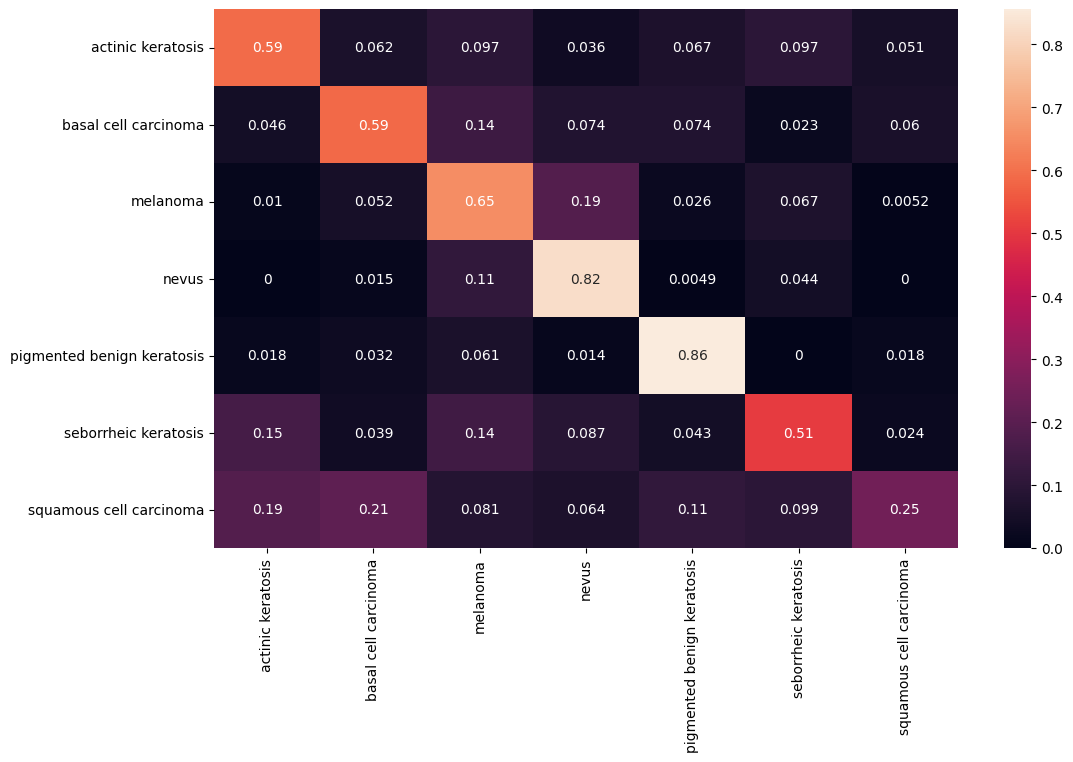

In [32]:
# classes= ('Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Scabies Lyme Disease and other Infestations and Bites',  'Systemic Disease', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections')
classes=('actinic keratosis', 'basal cell carcinoma', 'melanoma', 'nevus', 'pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma')
correct = 0
total = 0
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

y_pred = []
y_true = []

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        
        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        _, predictions = torch.max(outputs, 1)
        y_pred.extend(predictions.cpu())
        y_true.extend(labels.cpu())
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


print(f'Accuracy of the network on the test images: {100 * correct // total} %')

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    
    
    
    
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
# classes= ('Monkeypox','Normal')

In [ ]:
# correct_pred = {classname: 0 for classname in classes}
# total_pred = {classname: 0 for classname in classes}


# with torch.no_grad():
#     for data in testloader:
#         images, labels = data

#         outputs = model(images)
        
#         _, predictions = torch.max(outputs, 1)
#         for label, prediction in zip(labels, predictions):
#             if label == prediction:
#                 correct_pred[classes[label]] += 1
#             total_pred[classes[label]] += 1


# # print accuracy for each class
# for classname, correct_count in correct_pred.items():
#     accuracy = 100 * float(correct_count) / total_pred[classname]
#     print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [17]:
sample_dir = "E:\\Anaconda\\envs\\dataset\\test"

In [18]:
sample_data = torchvision.datasets.ImageFolder(root=sample_dir, transform=TRANSFORM_IMG)
sample_data

Dataset ImageFolder
    Number of datapoints: 13
    Root location: E:\Anaconda\envs\dataset\test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [21]:
len(sample_data)

15

In [19]:
sampleloader = torch.utils.data.DataLoader(sample_data, batch_size=1,shuffle=True)
sampleloader

In [20]:
images,labels = next(iter(sampleloader))
    

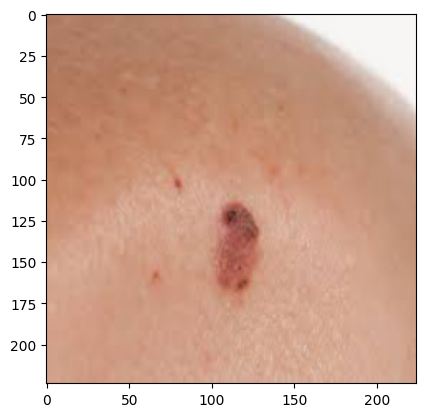

Label: tensor([6])


In [20]:
plt.imshow(images[0].permute(1,2,0))
plt.show()
print(f"Label: {labels}")

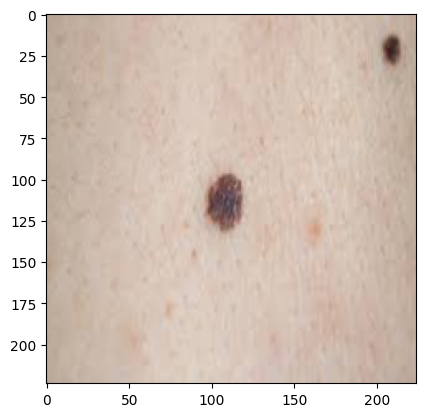

predicted class: nevus
Label: melanoma


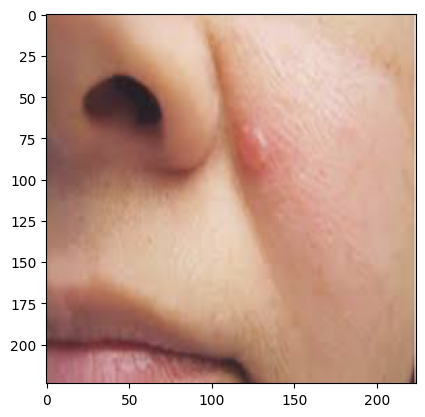

predicted class: seborrheic keratosis
Label: basal cell carcinoma


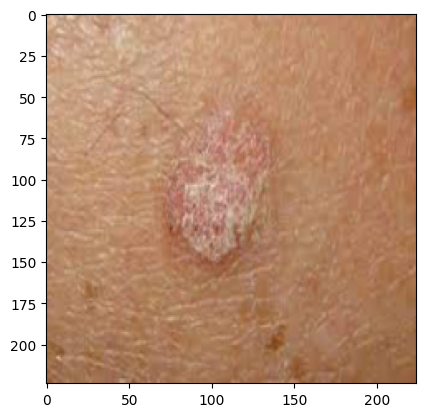

predicted class: actinic keratosis
Label: actinic keratosis


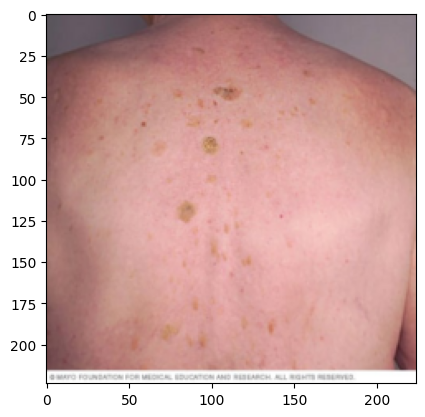

predicted class: seborrheic keratosis
Label: pigmented benign keratosis


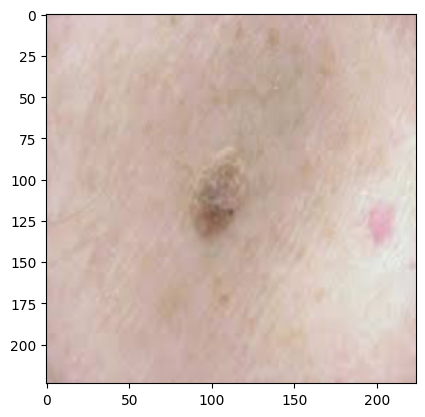

predicted class: seborrheic keratosis
Label: seborrheic keratosis


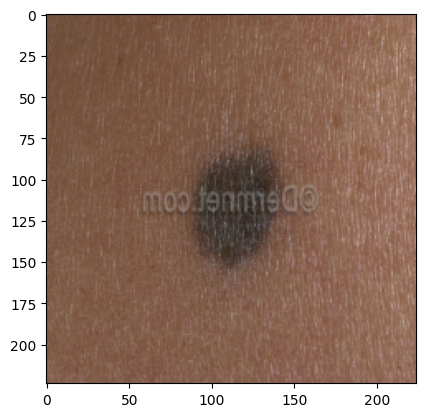

predicted class: basal cell carcinoma
Label: nevus


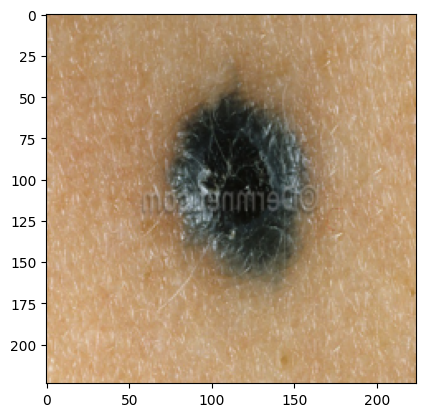

predicted class: nevus
Label: nevus


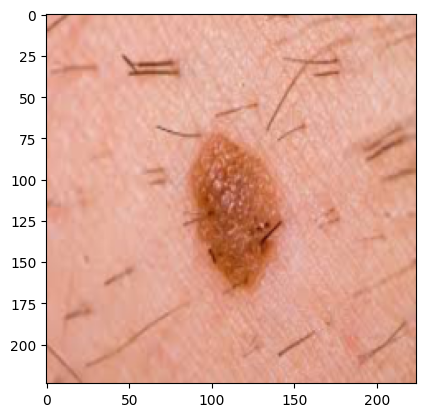

predicted class: melanoma
Label: seborrheic keratosis


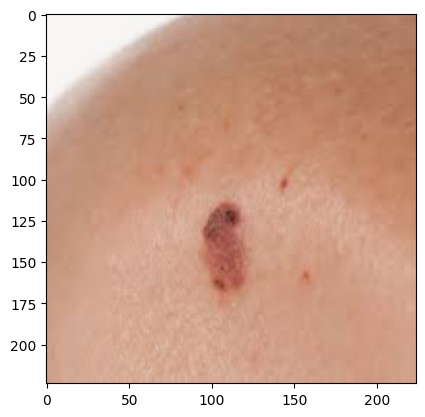

predicted class: seborrheic keratosis
Label: squamous cell carcinoma


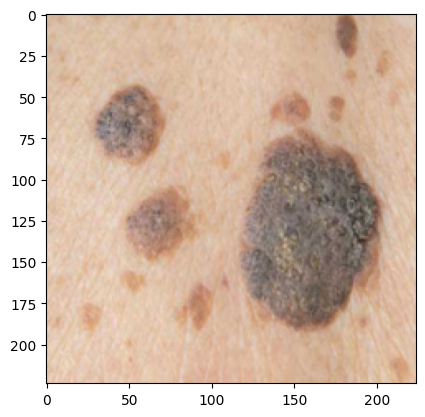

predicted class: seborrheic keratosis
Label: seborrheic keratosis


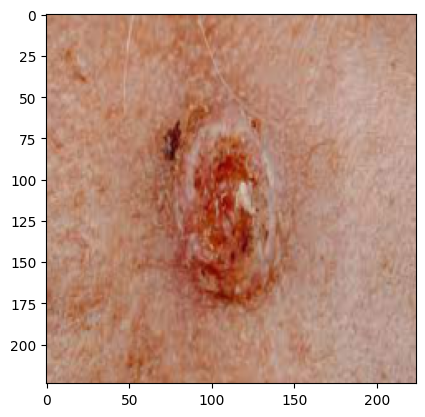

predicted class: basal cell carcinoma
Label: squamous cell carcinoma


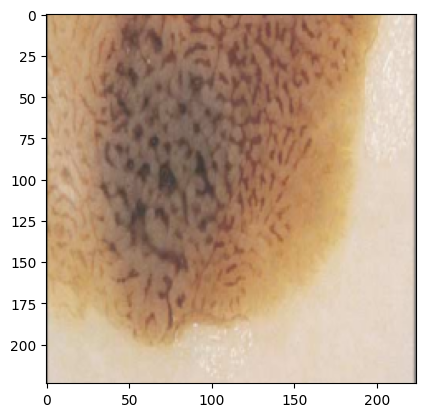

predicted class: seborrheic keratosis
Label: pigmented benign keratosis


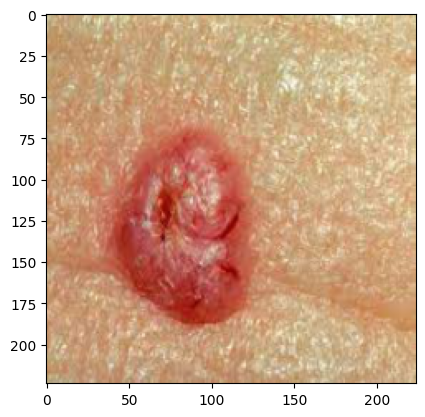

predicted class: basal cell carcinoma
Label: basal cell carcinoma


In [38]:
for data in sampleloader:
    images, labels = data[0].to(device), data[1].to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
          
    plt.imshow(torch.Tensor.cpu(torch.squeeze(images.permute(0,2,3,1))))
    plt.show()
        
    print(f"predicted class: {classes[predicted]}")
    print(f"Label: {classes[labels]}")
        
        
    
        
    